In [38]:
import numpy as np
import pickle
import pandas as pd

In [50]:
real_data_df = pd.read_csv('../data/raw/real/normalized_deviation_updated.csv') 
dataset_name = "normalized_deviation_updated"

In [51]:
real_data_df = real_data_df.rename(columns={"Schedule deviation":"data"}, errors="raise")

Plot dataset on 
- August 2nd 2022 from 14:00 to 20:00. Known artifacts starting at 15:30 and 17:30
- July 29th from 11:00 to 15:00. Known artifacts starting at 11:30 and 12:30 (? - maybe rather 14:00)


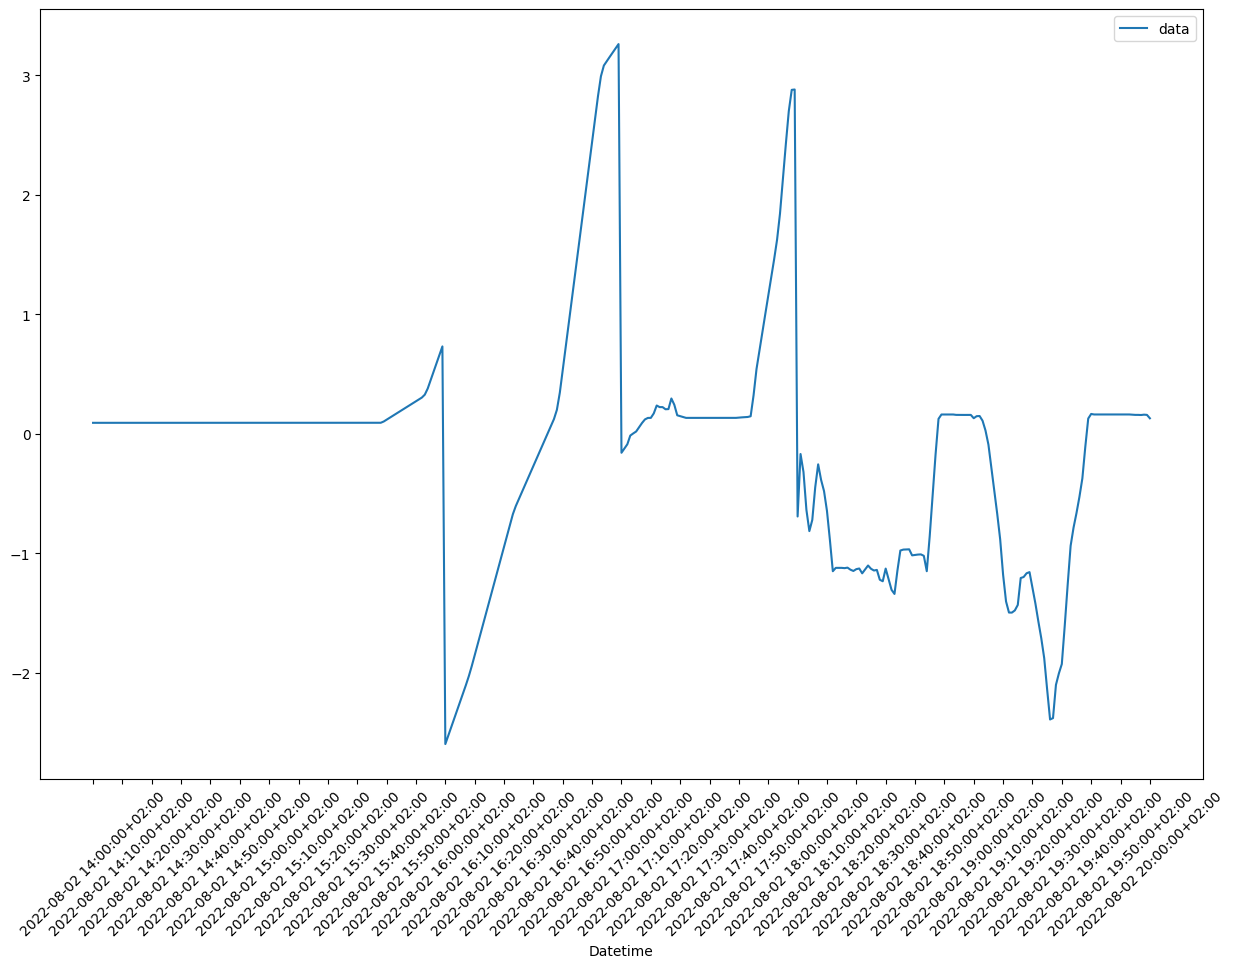

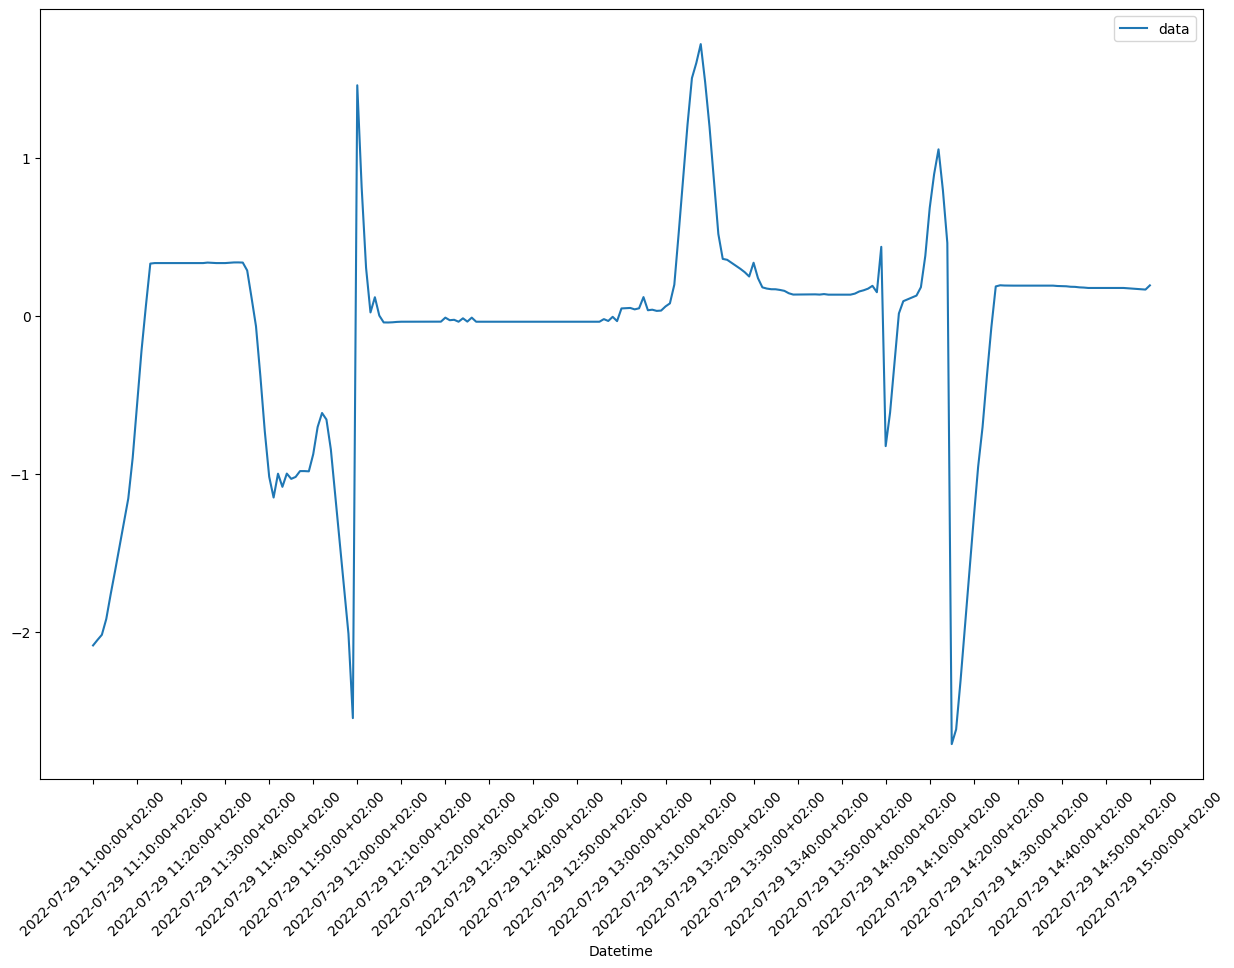

In [72]:
plot = real_data_df.set_index('Datetime').loc['2022-08-02 14:00:00+02:00' : '2022-08-02 20:00:00+02:00'].plot(figsize=(15,10), 
                                                                                                              rot=45, 
                                                                                                              xticks=np.arange(real_data_df.set_index('Datetime').loc['2022-08-02 14:00:00+02:00' : '2022-08-02 20:00:00+02:00'].shape[0], step=10)
                                                                                                              )
plot2 = real_data_df.set_index('Datetime').loc['2022-07-29 11:00:00+02:00' : '2022-07-29 15:00:00+02:00'].plot(figsize=(15,10), 
                                                                                                               rot=45,
                                                                                                               xticks=np.arange(real_data_df.set_index('Datetime').loc['2022-07-29 11:00:00+02:00' : '2022-07-29 15:00:00+02:00'].shape[0], step=10)
                                                                                                               )

In [73]:
dataset = [real_data_df["data"].values.tolist()]

In [74]:
def save(data: np.ndarray,
         to: str):
    assert isinstance(data, list)
    assert isinstance(data[0], list)
    assert isinstance(data[0][0], float)
    with open(to, "wb") as f:
        pickle.dump(data, f)

In [75]:
save(dataset,
     f"../data/processed/{dataset_name}_TEST.pickle")